## MOVIE INVESTMENT PROJECT ANALYSIS

#### Importing Necessary Packages

In [2]:
# numpy for numerical operations
import numpy as np
# pandas for data analysis and data manipulation
import pandas as pd
# matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
plt.style.use('seaborn-whitegrid')
# To filter warnings
import warnings 
warnings.filterwarnings('ignore')
#sqlite3 for manipulating the sql database
import sqlite3 

#### Loading Data

#### First Dataframe

In [3]:
# Loading the first dataframe
df1 = pd.read_csv ("C:\\Users\\User-PC\\Project_Dataset\\dsc-phase-1-project-v2-4\\zippedData\\bom.movie_gross.csv")
#Display top rows of the dataset
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
# Display bottom five rows of the data set
df1.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


#### Data Understanding

#### General Data Overview

In [5]:
# Number of rows and columns
df1.shape

(3387, 5)

In [6]:
# Column overview(number of none missing values,datatype)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [7]:
# Statistical summary of the dataset
df1.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


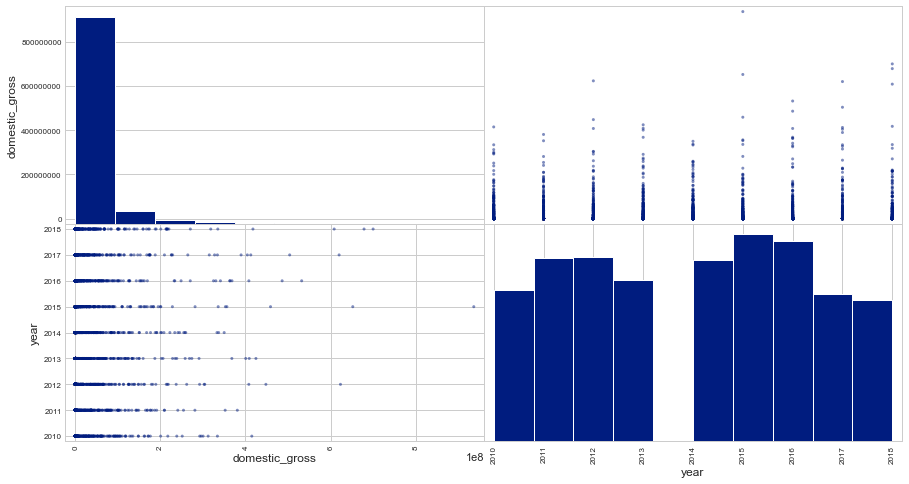

In [8]:
# Relationship Between Variables
plt.style.use('seaborn-dark-palette')
pd.plotting.scatter_matrix(df1);

In [9]:
# Checking missing values
missing = df1.isna().sum()
missing

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [10]:
# Percentage of missing values
per_missing_df1 = missing*100/len(df1)
per_missing_df1 =per_missing_df1.sort_values(ascending = False).head(3)
per_missing_df1

foreign_gross     39.858282
domestic_gross     0.826690
studio             0.147623
dtype: float64

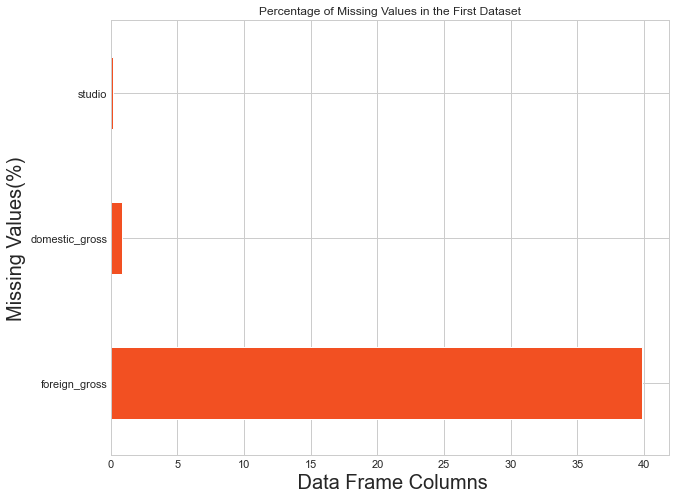

In [11]:
# Visualising missing values
fig, ax = plt.subplots()
ax=per_missing_df1.plot(kind = 'barh',color = '#F25022',figsize= (10,8))
ax.set_title('Percentage of Missing Values in the First Dataset')
ax.set_xlabel(' Data Frame Columns',fontsize=20)
ax.set_ylabel('Missing Values(%)',fontsize=20);

In [12]:
# Check for duplicates
dup_data = df1.duplicated().any()
dup_data 

False

#### Data Cleaning/Preparation

#### Handling Missing Values

The foreign_gross column has 39% of its values missing. we can fill in the missing values but that will require us to know whether the data is skewed or not. If the data is skewed then we use the median otherwise the mean.

In [13]:
# Converting foreign_gross datatype to allow for numeric operations
df1['foreign_gross'] = df1['foreign_gross'].str.replace(',', '').astype('float')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [14]:
# Check whether it appears in the numeric operations 
df1.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.037000e+03,3387.000000
mean,2.874585e+07,7.487281e+07,2013.958075
std,6.698250e+07,1.374106e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.700000e+06,2012.000000
50%,1.400000e+06,1.870000e+07,2014.000000
75%,2.790000e+07,7.490000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


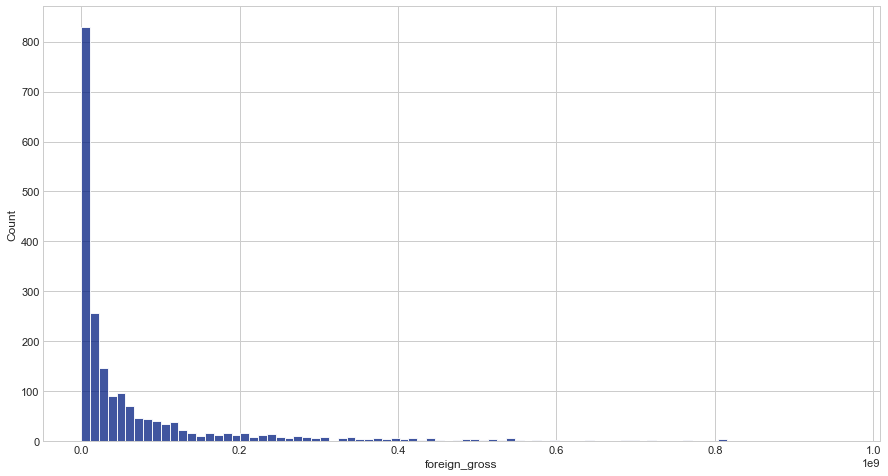

In [15]:
# foreign_gross distribution
sns.histplot(data = df1['foreign_gross']);

The data is positively skewed hence prompting the use of the median to fill in missing values as it will be the best measure for central tendency given that it is unaffected by extreme outliers or non-symmetric distributions of data.

In [16]:
# filling missing values
df1.fillna({'foreign_gross': df1['foreign_gross'].median()},inplace = True)
df1['foreign_gross'].isna().sum()

0

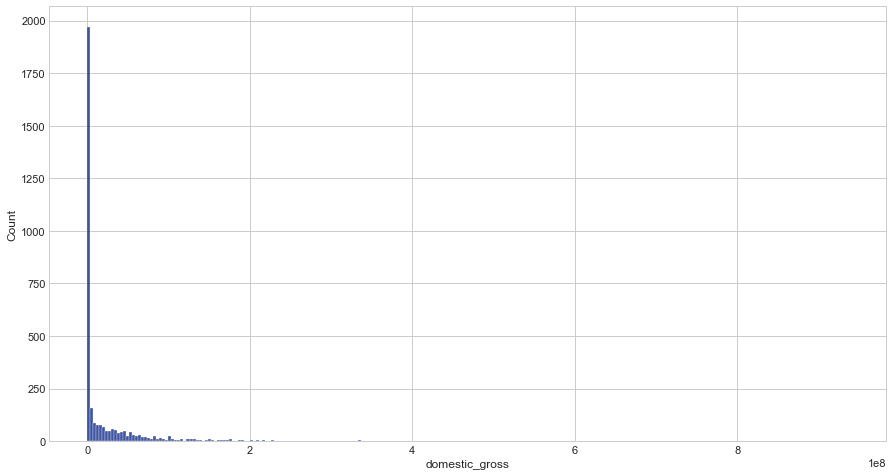

In [17]:
# Visualizing the domestic_gross disribution
sns.histplot(data = df1['domestic_gross']);


The domestic_gross data is positively skewed hence making the median the best measure for central tendency as it is unaffected by extreme outliers or non-symmetric distributions of values. For this reason we will use it to fill in our missing values.

In [18]:
# filling in the domestic_gross missing values with the median
df1.fillna({'domestic_gross':df1['domestic_gross'].median()},inplace = True)
df1['domestic_gross'].isna().sum()

0

for the studio given that its a categorical data the best measure for central tendency would be the mode so we use it to fill in the missing values.

In [19]:
# filling in studio missing values with the mode
df1.fillna({'studio': df1['studio'].mode()[0]},inplace = True)
df1['studio'].isna().sum()

0

#### Checking for Outliers

To visualize the outliers in the dataset,we will come up with a function that generates a box plot for our individual columns.

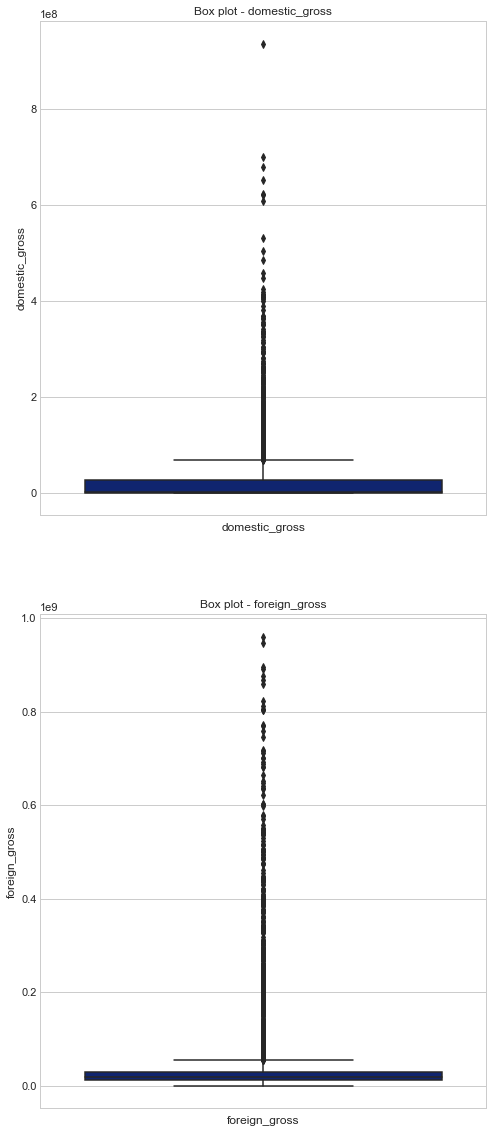

In [20]:
col_names = ['domestic_gross','foreign_gross']

fig, ax = plt.subplots(len(col_names), figsize= (8,20))

for i, col_val in enumerate(col_names):
    sns.boxplot(y = df1[col_val], ax= ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val))
    ax[i].set_xlabel(col_val)
plt.show()

There are too many outliers in the data analyzed above, and removing them could make the findings erroneous or inconclusive.

#### Second DataFrame

In [21]:
# Importing Data
df2 = pd.read_csv("C:\\Users\\User-PC\\Project_Dataset\\dsc-phase-1-project-v2-4\\zippedData\\tn.movie_budgets.csv")


In [22]:
#Display top rows of the dataset
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [23]:
# Display bottom five rows of the data set
df2.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [24]:
df2.shape

(5782, 6)

In [25]:
df2.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

#### Data Understanding

#### General Data Overview

In [26]:
# Number of rows and columns
df2.shape

(5782, 6)

In [27]:
# Column overview(number of none missing values,datatype)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [28]:
# Statistical summary of the dataset
df2.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [29]:
# Checking missing values
missing = df2.isna().sum()
missing

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [30]:
# Check for duplicates
dup_data = df2.duplicated().any()
dup_data 

False

#### Data Understanding

In [31]:
# Converting production_budget 'production_budget', 'domestic_gross','worldwide_gross' into float datatype
df2['production_budget'] = df2['production_budget'].str.replace(',','')
df2['production_budget'] = df2['production_budget'].str.replace('$','').astype('float')


In [32]:
df2['domestic_gross'] = df2['domestic_gross'].str.replace(',','')
df2['domestic_gross'] = df2['domestic_gross'].str.replace('$','').astype('float')

In [33]:
df2['worldwide_gross'] = df2['worldwide_gross'].str.replace(',','')
df2['worldwide_gross'] = df2['worldwide_gross'].str.replace('$','').astype('float')

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [35]:
df2.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


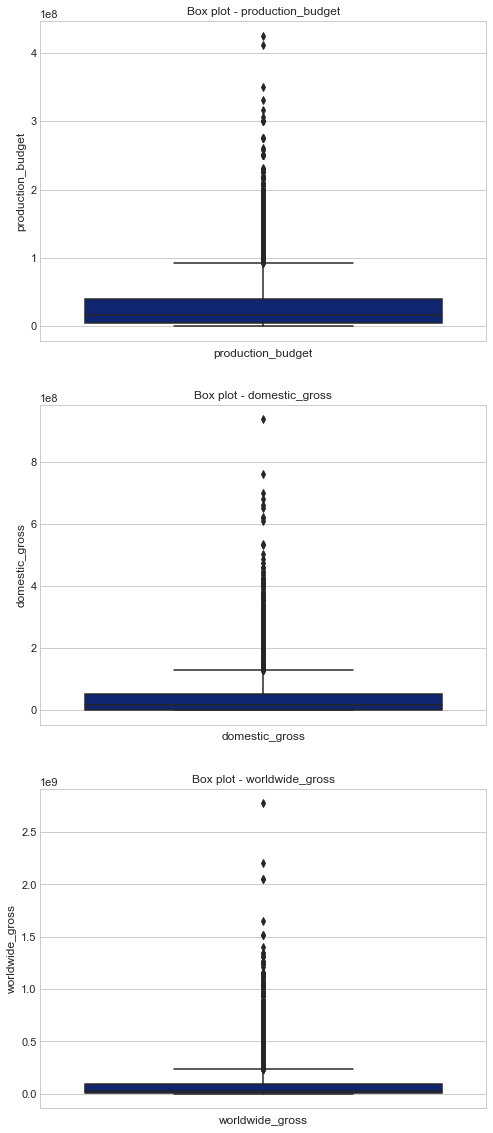

In [36]:
# Generating box plots to identify outliers
col_names = ['production_budget','domestic_gross','worldwide_gross',]

fig, ax = plt.subplots(len(col_names), figsize= (8,20))

for i, col_val in enumerate(col_names):
    sns.boxplot(y = df2[col_val], ax= ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val))
    ax[i].set_xlabel(col_val)
plt.show()

From the boxplots there are too many outliers which if dropped will affect the results of the analysis

#### Data Analysis

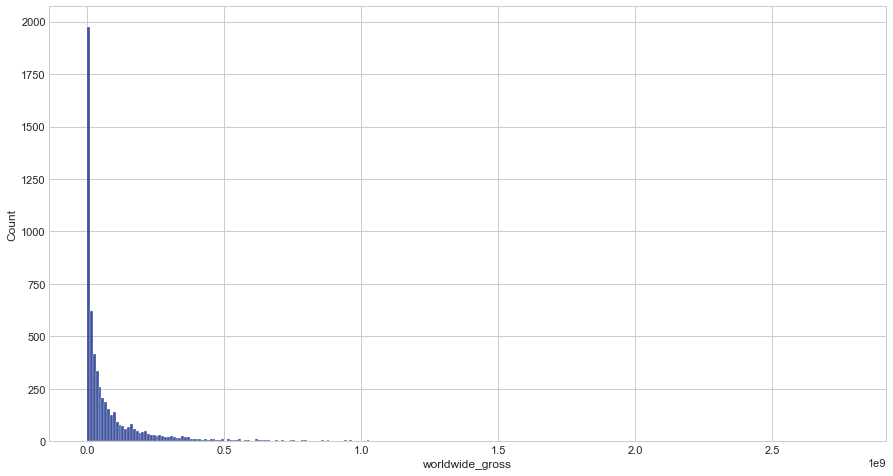

In [37]:
#worldwide_gross distribution
sns.histplot(data = df2['worldwide_gross']);

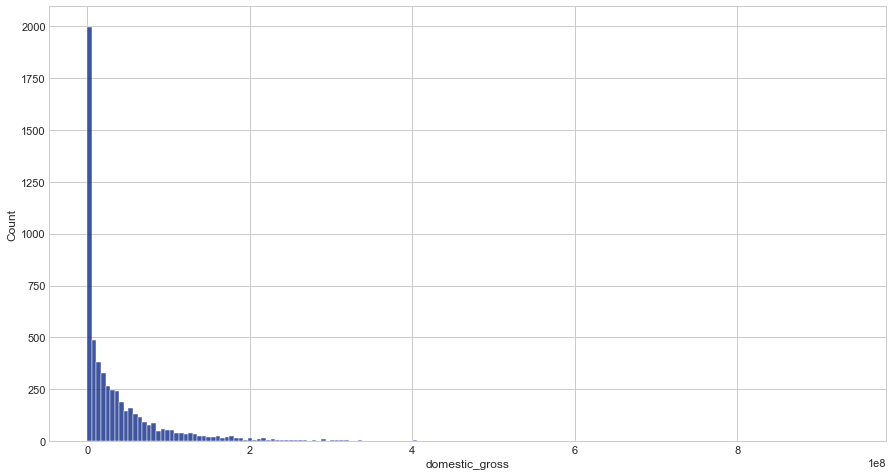

In [38]:
#worldwide_gross distribution
sns.histplot(data = df2['domestic_gross']);

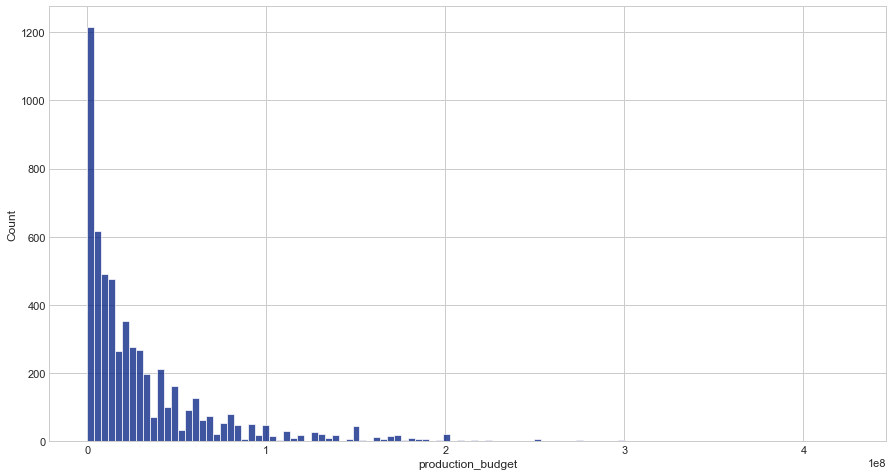

In [39]:
# Production budget distribution
sns.histplot(data = df2['production_budget']);

In [40]:
# Adding necessary columns for the analysis
#Total gross column
gross = df2['domestic_gross'] + df2['worldwide_gross']
df2['Total_gross'] = gross
df2.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'Total_gross'],
      dtype='object')

In [41]:
df2_diff = df2['Total_gross']- df2['production_budget']
df2['Profit'] = df2_diff
df2.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'Total_gross', 'Profit'],
      dtype='object')

#### Third Dataframe

In [42]:
# Creating a connection with the database
conn = sqlite3.connect("zippedData/im.db")

In [43]:
#Creating a cursor to get tables in the dataset
cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master where type = 'table'
;
""")
# Fetching the results
tables = cur.fetchall()
tables

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [44]:
# Display of the basics table 
pd.read_sql("""
SELECT*
FROM movie_basics
LIMIT 5
;
""",conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [45]:
#Overview of the rating table
q = """
SELECT*
FROM movie_ratings
;
"""
pd.read_sql(q,conn).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [46]:
#Join tables to get better analysis
q = """
SELECT*
FROM movie_basics
JOIN movie_ratings
USING(movie_id)
;
"""
df3 = pd.read_sql(q,conn)
df3.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [47]:
#General info
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [48]:
# Statistical summary
df3.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


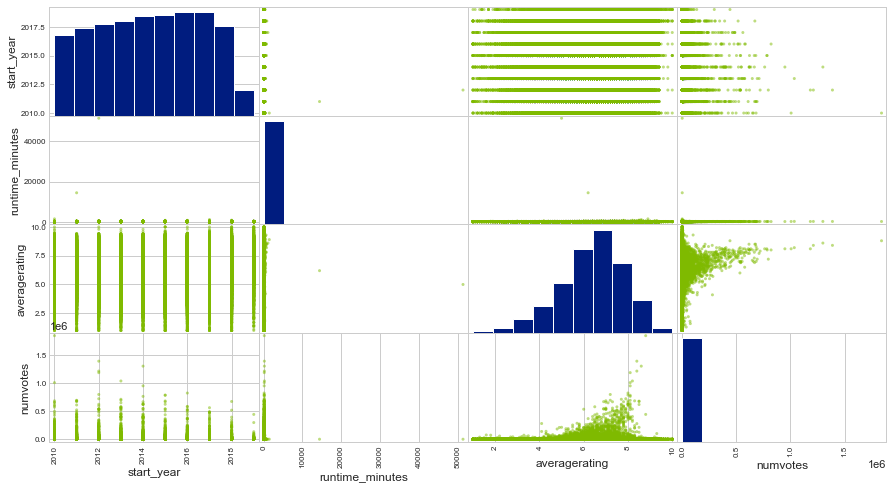

In [49]:
# Relationship Between Variables
pd.plotting.scatter_matrix(df3,color = '#7FBA00');

In [50]:
#Checking Missing Values
df3_missing = df3.isna().sum()
df3_missing

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [51]:
# Percentage of missing values
per_missing_df3 = df3_missing*100/len(df3)
per_missing_df3 = per_missing_df3.sort_values(ascending = False).head(2)
per_missing_df3 

runtime_minutes    10.317374
genres              1.088605
dtype: float64

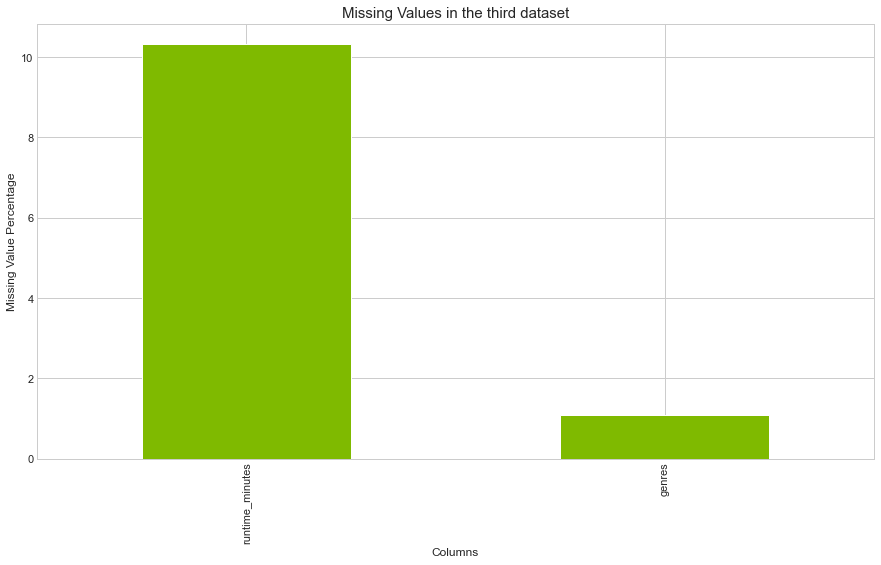

In [94]:

ax = per_missing_df3.plot(kind = 'bar',color = '#7FBA00')
ax.set_title('Missing Values in the third dataset', fontsize = 15)
ax.set_xlabel('Columns')
ax.set_ylabel('Missing Value Percentage')
ax;

In [53]:
# Check for duplicates
dup_data = df3.duplicated().any()
dup_data 

False

In [54]:
# Define a function called Plot_boxplt
def plot_boxplt(df,ft):
    df.boxplot(column = [ft])
    plt.grid(False)
    plt.show()

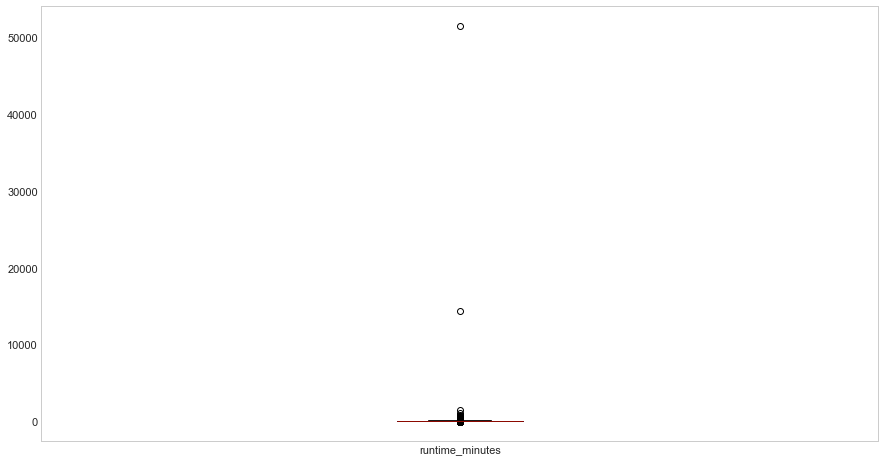

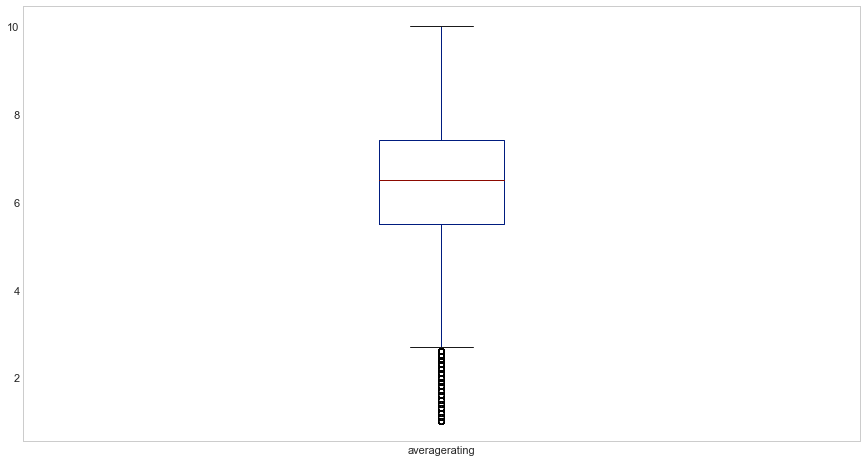

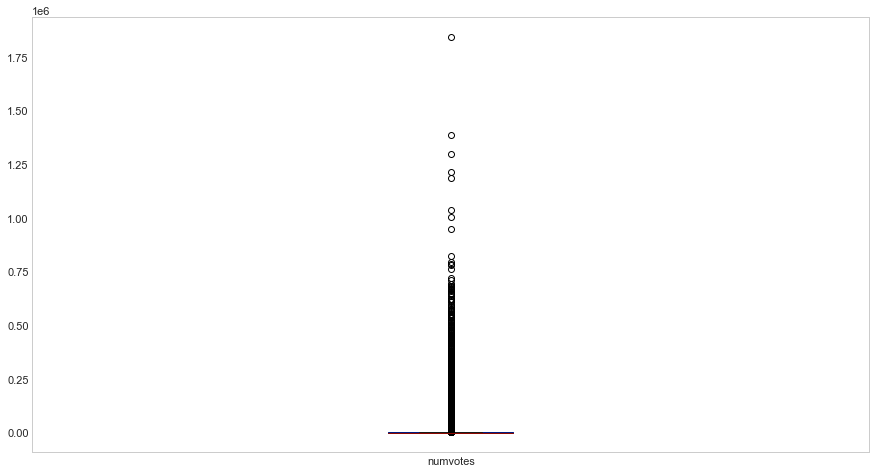

In [55]:
# Checking for outliers in the dataset
plot_boxplt(df3,'runtime_minutes')
plot_boxplt(df3,'averagerating')
plot_boxplt(df3,'numvotes')

From the boxplots there are too many outliers which if dropped will affect the results of the analysis

In [56]:
#Drop missing values
df3.dropna(subset = ['genres','runtime_minutes'],inplace=True)
df3.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

#### Data Analysis & Visualization

From the above its quite easy to tell genres that have received the highest rating.This gives a clear view of what people liked.

#### Merging Datasets

In [57]:
# Merging the Firsttwo
df1df2 = pd.merge(left = df1, right = df2,how="inner",left_on='title',right_on = 'movie')
df1df2.head()

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,Total_gross,Profit
0,Toy Story 3,BV,415000000.0,652000000.0,2010,47,"Jun 18, 2010",Toy Story 3,200000000.0,415004880.0,1.068880e+09,1.483884e+09,1.283884e+09
1,Inception,WB,292600000.0,535700000.0,2010,38,"Jul 16, 2010",Inception,160000000.0,292576195.0,8.355246e+08,1.128101e+09,9.681008e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,27,"May 21, 2010",Shrek Forever After,165000000.0,238736787.0,7.562447e+08,9.949815e+08,8.299815e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000.0,300531751.0,7.061028e+08,1.006635e+09,9.386346e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,15,"May 7, 2010",Iron Man 2,170000000.0,312433331.0,6.211564e+08,9.335897e+08,7.635897e+08


In [58]:
# Checking for missing values in the
df1df2.isna().sum()

title                0
studio               0
domestic_gross_x     0
foreign_gross        0
year                 0
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross_y     0
worldwide_gross      0
Total_gross          0
Profit               0
dtype: int64

In [59]:
# Studios earning the highest profits
top_studio_profit= pd.DataFrame(df1df2.groupby("studio")["Profit"].mean().sort_values(ascending=False).head(10))
top_studio_profit

,Profit
studio,
P/DW,5.426942e+08
BV,5.105744e+08
Uni.,2.687045e+08
WB (NL),2.651323e+08
Sony,2.650172e+08
Fox,2.586413e+08
GrtIndia,2.524887e+08
WB,2.267318e+08
Par.,2.118299e+08


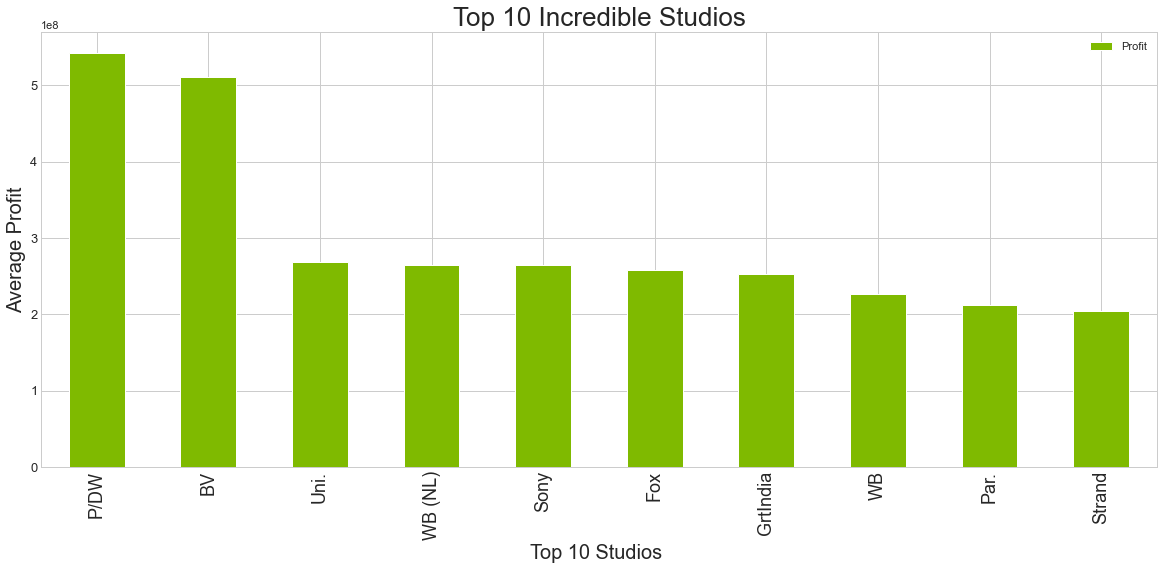

In [60]:
#plotting bar graph of top five genres with highest profit
ax = top_studio_profit.plot(kind='bar', figsize=(20,8), color="#7FBA00", fontsize=13);
ax.set_alpha(0.8)

ax.set_title("Top 10 Incredible Studios", fontsize=26)
ax.set_ylabel("Average Profit", fontsize=20);
ax.set_xlabel("Top 10 Studios ", fontsize=20)
plt.xticks(fontsize= 18)
plt.show()

The analysis given shows the top ten earning studios with P/DW earning the highest profit

In [61]:
# Studios with highest production budget
exp_studio= pd.DataFrame(df1df2.groupby("studio")["production_budget"].mean().sort_values(ascending=False).head(10))
exp_studio

,production_budget
studio,
P/DW,1.334000e+08
BV,1.312611e+08
WB,8.036961e+07
Fox,7.050455e+07
NM,7.000000e+07
Sony,6.825000e+07
Par.,6.445946e+07
WB (NL),5.807027e+07
Uni.,5.639060e+07


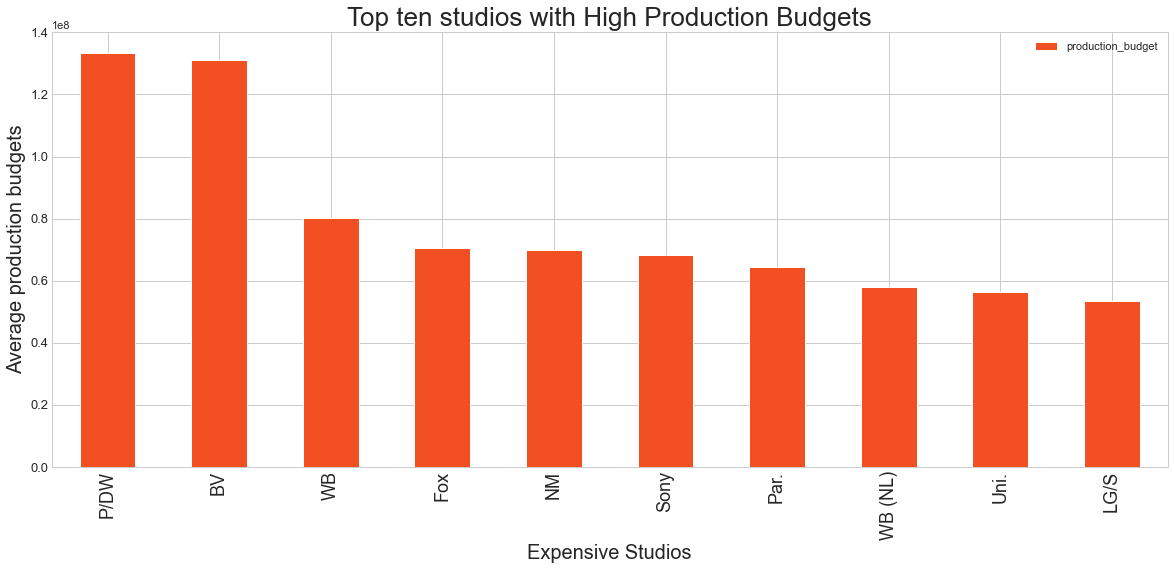

In [92]:
#plotting bar graph of top five genres with highest Production Budgets
ax = exp_studio.plot(kind='bar', figsize=(20,8), color="#F25022", fontsize=13);
ax.set_alpha(0.8)

ax.set_title("Top ten studios with High Production Budgets", fontsize=26)
ax.set_ylabel("Average production budgets", fontsize=20);
ax.set_xlabel("Expensive Studios", fontsize=20)
plt.xticks(fontsize= 18)
plt.show()

With the studio and production budget comparison we are able to estimate what each studio investment.The studio earning the highest profit that is P/DW is still the same with the highest production budget.

In [63]:
df1df2.corr()

,domestic_gross_x,foreign_gross,year,id,production_budget,domestic_gross_y,worldwide_gross,Total_gross,Profit
domestic_gross_x,1.000000,0.800148,0.115646,-0.033904,0.700648,0.997049,0.936592,0.964083,0.964608
foreign_gross,0.800148,1.000000,0.115912,-0.047780,0.759489,0.798798,0.899468,0.883299,0.859881
year,0.115646,0.115912,1.000000,0.057641,0.074751,0.116380,0.127859,0.126320,0.129856
id,-0.033904,-0.047780,0.057641,1.000000,-0.075687,-0.033075,-0.050762,-0.046630,-0.038157
production_budget,0.700648,0.759489,0.074751,-0.075687,1.000000,0.703221,0.782763,0.770856,0.681862
domestic_gross_y,0.997049,0.798798,0.116380,-0.033075,0.703221,1.000000,0.939282,0.966875,0.967291
worldwide_gross,0.936592,0.899468,0.127859,-0.050762,0.782763,0.939282,1.000000,0.995756,0.984284
Total_gross,0.964083,0.883299,0.126320,-0.046630,0.770856,0.966875,0.995756,1.000000,0.991578
Profit,0.964608,0.859881,0.129856,-0.038157,0.681862,0.967291,0.984284,0.991578,1.000000


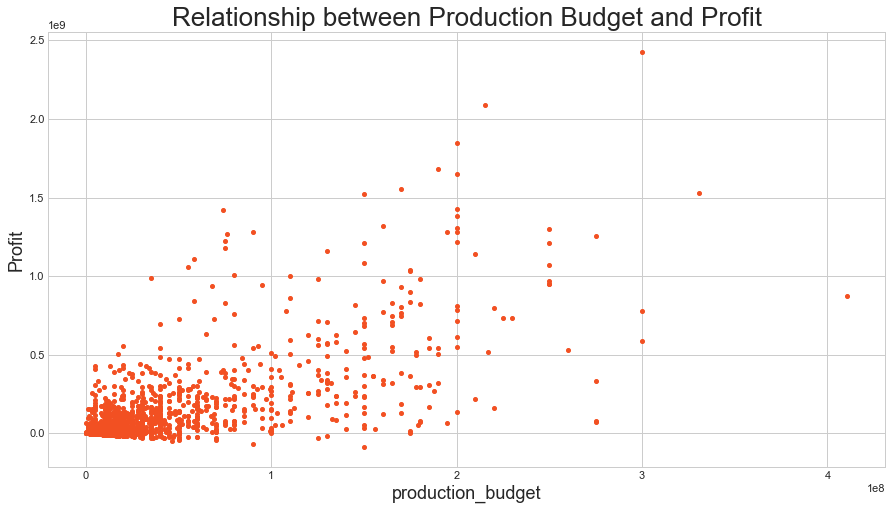

In [64]:
# Relationship between production budget with profit
plt.plot(df1df2.production_budget, df1df2.Profit,'o',markersize=4, color='#F25022')
plt.xlabel('production_budget', fontsize=18)
plt.ylabel('Profit', fontsize=18)
plt.title("Relationship between Production Budget and Profit", fontsize=26);

Profit and production_budget have a positive correlation;meaning that the higher the production budget the higher the profit expected. Equally, the lower the production budget the lower the returns expected.

In [65]:
# Merging the first and third dataset
df4 = pd.merge(left = df1, right = df3,how="inner",left_on='title',right_on = 'primary_title')
df4.head()

,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [66]:
df4.shape

(2975, 13)

In [67]:
# add necessary column
Total_gross = df4['domestic_gross'] + df4['foreign_gross']
df4['Total_gross'] = Total_gross
df4.shape

(2975, 14)

In [68]:
df4.describe()

,domestic_gross,foreign_gross,year,start_year,runtime_minutes,averagerating,numvotes,Total_gross
count,2.975000e+03,2.975000e+03,2975.000000,2975.000000,2975.000000,2975.000000,2.975000e+03,2.975000e+03
mean,3.045344e+07,5.481640e+07,2014.082353,2013.786891,107.257815,6.462353,6.277813e+04,8.526984e+07
std,6.687918e+07,1.122631e+08,2.441021,2.460644,20.048405,0.997381,1.263383e+05,1.708037e+08
min,1.000000e+02,6.000000e+02,2010.000000,2010.000000,3.000000,1.600000,5.000000e+00,1.080000e+04
25%,1.385000e+05,1.335000e+07,2012.000000,2012.000000,94.000000,5.900000,2.483000e+03,1.871215e+07
50%,1.900000e+06,1.870000e+07,2014.000000,2014.000000,105.000000,6.600000,1.374100e+04,1.970000e+07
75%,3.200000e+07,3.360000e+07,2016.000000,2016.000000,118.000000,7.100000,6.596050e+04,6.935000e+07
max,7.001000e+08,9.464000e+08,2018.000000,2019.000000,272.000000,9.200000,1.841066e+06,1.405400e+09


In [69]:
df4.corr()

,domestic_gross,foreign_gross,year,start_year,runtime_minutes,averagerating,numvotes,Total_gross
domestic_gross,1.000000,0.805672,0.010477,0.040074,0.127816,0.122267,0.668195,0.921095
foreign_gross,0.805672,1.000000,0.046075,0.067530,0.154189,0.114805,0.588165,0.972729
year,0.010477,0.046075,1.000000,0.822481,0.033309,0.034904,-0.124178,0.034386
start_year,0.040074,0.067530,0.822481,1.000000,0.077931,-0.005942,-0.079776,0.060076
runtime_minutes,0.127816,0.154189,0.033309,0.077931,1.000000,0.151515,0.259826,0.151390
averagerating,0.122267,0.114805,0.034904,-0.005942,0.151515,1.000000,0.283239,0.123332
numvotes,0.668195,0.588165,-0.124178,-0.079776,0.259826,0.283239,1.000000,0.648215
Total_gross,0.921095,0.972729,0.034386,0.060076,0.151390,0.123332,0.648215,1.000000


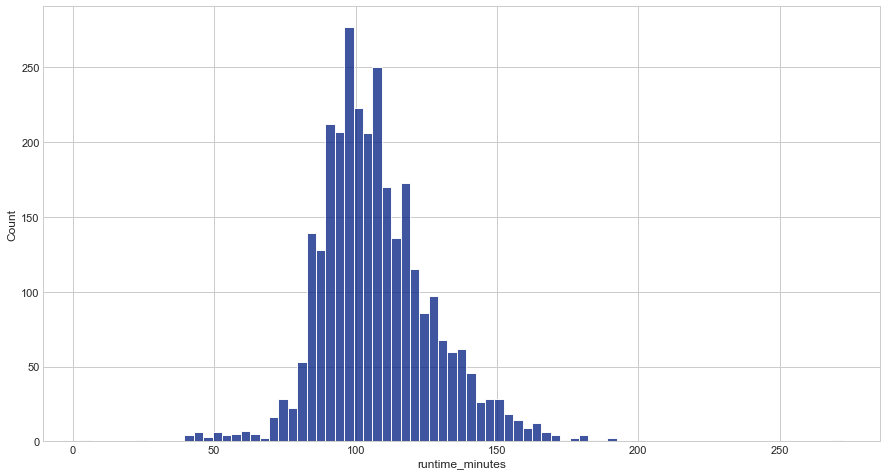

In [70]:
# Distribution of the runtime_minutes data
sns.histplot(data = df4['runtime_minutes']);


The runtime data has a normal distribution

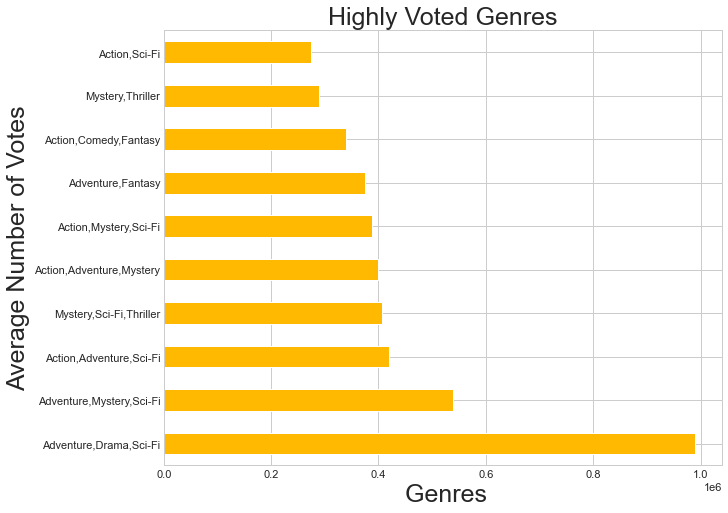

In [88]:
# Highly voted Genres
genres_votes = df4.groupby('genres')['numvotes'].mean().sort_values(ascending = False).head(10)
fig, ax = plt.subplots()
ax = genres_votes.plot(kind = 'barh',color = '#FFB900',figsize= (10,8))
ax.set_title('Highly Voted Genres',fontsize= 25)
ax.set_xlabel(' Genres',fontsize=25)
ax.set_ylabel('Average Number of Votes',fontsize=25);

In [89]:
genres_votes

genres
Adventure,Drama,Sci-Fi      989725.000000
Adventure,Mystery,Sci-Fi    538720.000000
Action,Adventure,Sci-Fi     419616.851064
Mystery,Sci-Fi,Thriller     406532.500000
Action,Adventure,Mystery    399703.000000
Action,Mystery,Sci-Fi       387038.000000
Adventure,Fantasy           375770.333333
Action,Comedy,Fantasy       339338.000000
Mystery,Thriller            290034.500000
Action,Sci-Fi               273938.000000
Name: numvotes, dtype: float64

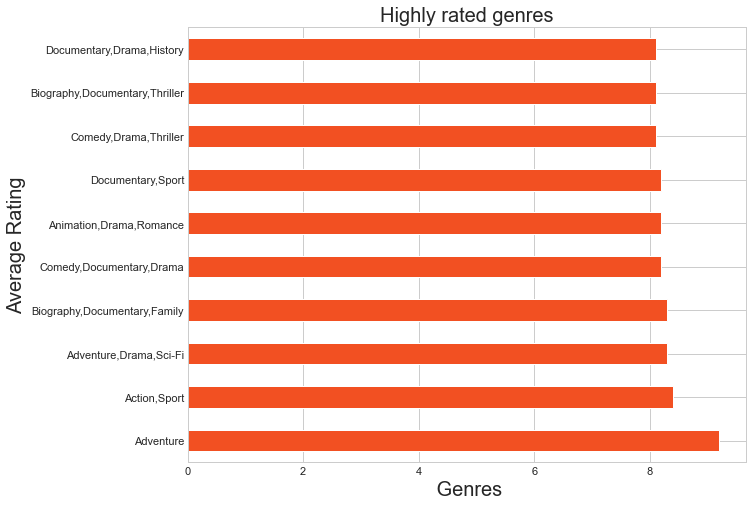

In [86]:
# Highly rated Genres
genres_rating = df4.groupby('genres')['averagerating'].mean().sort_values(ascending = False).head(10)
fig, ax = plt.subplots()
ax=genres_rating.plot(kind = 'barh',color = '#F25022',figsize= (10,8))
ax.set_title('Highly rated genres',fontsize=20)
ax.set_xlabel(' Genres',fontsize=20)
ax.set_ylabel('Average Rating',fontsize=20);

In [75]:
genres_rating

genres
Adventure                         9.2
Action,Sport                      8.4
Adventure,Drama,Sci-Fi            8.3
Biography,Documentary,Family      8.3
Comedy,Documentary,Drama          8.2
Animation,Drama,Romance           8.2
Documentary,Sport                 8.2
Comedy,Drama,Thriller             8.1
Biography,Documentary,Thriller    8.1
Documentary,Drama,History         8.1
Name: averagerating, dtype: float64

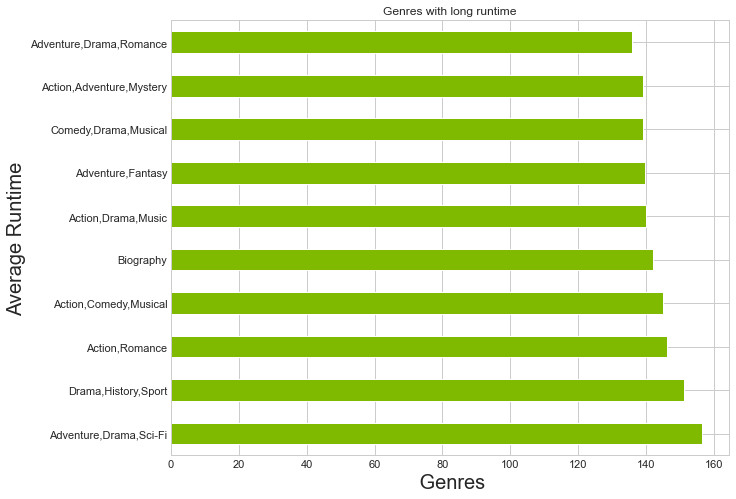

In [90]:
# Highly rated Genres
genres_time = df4.groupby('genres')['runtime_minutes'].mean().sort_values(ascending = False).head(10)
fig, ax = plt.subplots()
ax = genres_time.plot(kind = 'barh',color = '#7FBA00',figsize= (10,8))
ax.set_title('Genres with long runtime')
ax.set_xlabel(' Genres',fontsize=20)
ax.set_ylabel('Average Runtime',fontsize=20);

Adventure drama Sci-Fi had the longest average movie runtime.

In [78]:
# Top ten genres with long runtimes 
genres_time

genres
Adventure,Drama,Sci-Fi      156.500000
Drama,History,Sport         151.000000
Action,Romance              146.000000
Action,Comedy,Musical       145.000000
Biography                   142.000000
Action,Drama,Music          140.000000
Adventure,Fantasy           139.666667
Comedy,Drama,Musical        139.000000
Action,Adventure,Mystery    139.000000
Adventure,Drama,Romance     135.666667
Name: runtime_minutes, dtype: float64

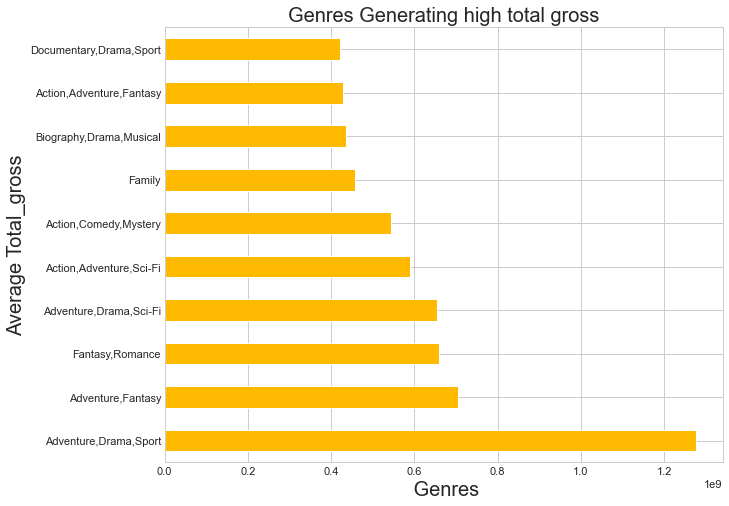

In [91]:
# Genres Generating high total gross
genres_gross = df4.groupby('genres')['Total_gross'].mean().sort_values(ascending = False).head(10)
fig, ax = plt.subplots()
ax = genres_gross.plot(kind = 'barh',color = '#FFB900',figsize= (10,8))
ax.set_title('Genres Generating high total gross',fontsize = 20)
ax.set_xlabel(' Genres',fontsize=20)
ax.set_ylabel('Average Total_gross',fontsize=20);

The above is a presentation of some of the genres earning a high total gross.

In [80]:
genres_gross

genres
Adventure,Drama,Sport       1.276400e+09
Adventure,Fantasy           7.040333e+08
Fantasy,Romance             6.590215e+08
Adventure,Drama,Sci-Fi      6.537500e+08
Action,Adventure,Sci-Fi     5.884001e+08
Action,Comedy,Mystery       5.441000e+08
Family                      4.584500e+08
Biography,Drama,Musical     4.350000e+08
Action,Adventure,Fantasy    4.295125e+08
Documentary,Drama,Sport     4.207250e+08
Name: Total_gross, dtype: float64

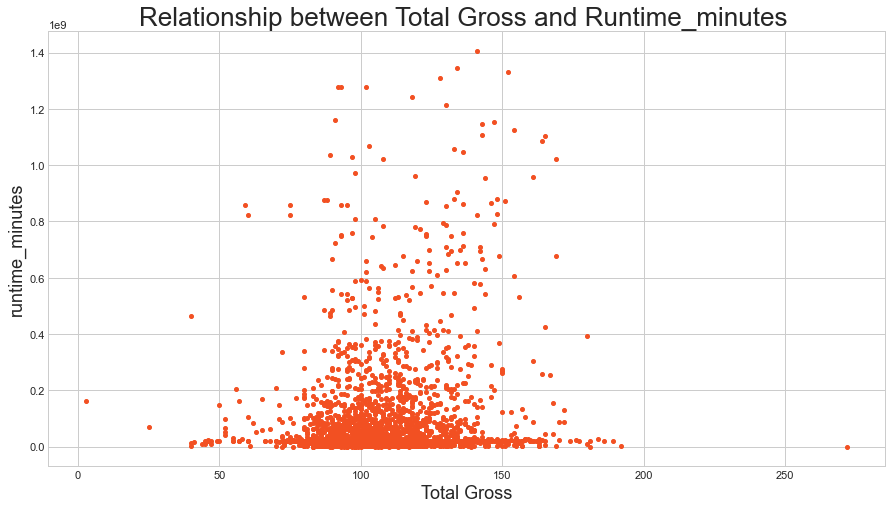

In [81]:
# Relationship between runtime_minutes and total_gross
plt.plot(df4.runtime_minutes, df4.Total_gross,'o',markersize=4, color='#F25022')
plt.xlabel('Total Gross', fontsize=18)
plt.ylabel('runtime_minutes', fontsize=18)
plt.title("Relationship between Total Gross and Runtime_minutes ", fontsize=26);

There exists a weak positive correlation between total gross and runtime in minutes

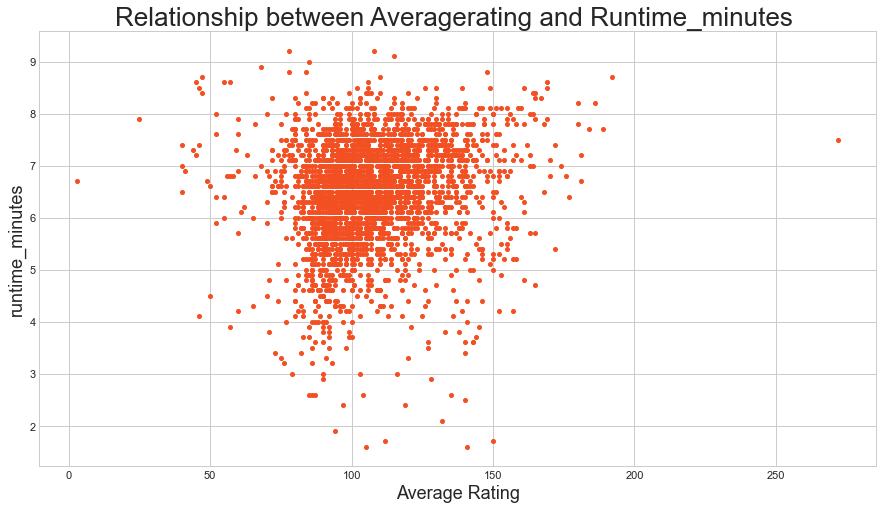

In [82]:
# Relationship between runtime_minutes and average rating
plt.plot(df4.runtime_minutes, df4.averagerating,'o',markersize=4, color='#F25022')
plt.xlabel('Average Rating', fontsize=18)
plt.ylabel('runtime_minutes', fontsize=18)
plt.title("Relationship between Averagerating and Runtime_minutes ", fontsize=26);

There exists a weak positive relationship between average rating and runtime in minutes

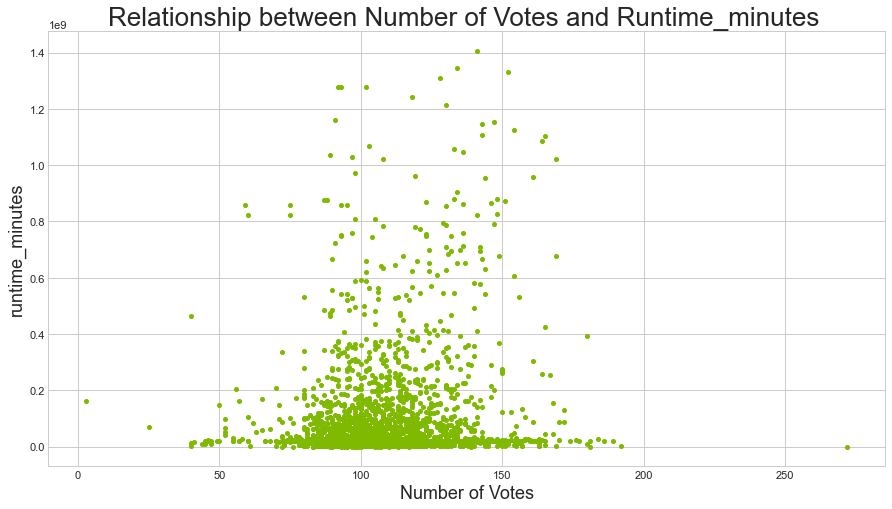

In [84]:
# Relationship between runtime_minutes and number of votes
plt.plot(df4.runtime_minutes, df4.Total_gross,'o',markersize=4, color='#7FBA00')
plt.xlabel('Number of Votes', fontsize=18)
plt.ylabel('runtime_minutes', fontsize=18)
plt.title("Relationship between Number of Votes and Runtime_minutes ", fontsize=26);